In [44]:
from itertools import islice
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [108]:
n = 5
c = 1.05e-8  # half duration = c*(moment)**1/3
mag7plus = pd.DataFrame(columns=['name', 'mb', 'ms', 'Tc', 'duration', 'TcNormed', 'duration2', 'TcNormed2'])
with open('Data/GCMTcatalog.ndk', 'r') as catalog:
    while True:
        next_n_lines = list(islice(catalog, n))
        if not next_n_lines:
            break
            
        line1 = next_n_lines[0]
        line2 = next_n_lines[1]
        line3 = next_n_lines[2]
        # process next_n_lines
        # map the magnitude portion into a list of floats
        mags = list(map(float, line1[48:55].split()))
        mb = 9999
        ms = 9999
        Tc = 9999
        duration = 9999
        name = 'error'
        mrf = 'error'
        # check if any magnitudes are >= 7
        # if all(mag >= 7.0 for mag in mags) or mags[0] >= 7.0 and mags[1] == 0.0 or mags[1] >= 7.0 and mags[0] == 0.0:
        if any(mag >= 7.0 for mag in mags):
            # print(f'''{line1}{line2}{line3}''')
            name = line1[0:16]
            mb = mags[0]
            ms = mags[1]
            Tc = float(line3[10:18])
            hfdur = float(line2[75:80])
            duration = 2*hfdur
            mo = (hfdur*c)**3
            duration2 = 
            mrf = 
            TcNormed = Tc/duration
            mag7plus = mag7plus.append({'name': name, 'mb': mb, 'ms': ms, 'Tc': Tc, 'duration': duration, 'TcNormed': TcNormed}, ignore_index=True)


/tmp/ipykernel_20249/2596211369.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mag7plus = mag7plus.append({'name': name, 'mb': mb, 'ms': ms, 'Tc': Tc, 'duration': duration, 'TcNormed': TcNormed}, ignore_index=True)
/tmp/ipykernel_20249/2596211369.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mag7plus = mag7plus.append({'name': name, 'mb': mb, 'ms': ms, 'Tc': Tc, 'duration': duration, 'TcNormed': TcNormed}, ignore_index=True)
/tmp/ipykernel_20249/2596211369.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mag7plus = mag7plus.append({'name': name, 'mb': mb, 'ms': ms, 'Tc': Tc, 'duration': duration, 'TcNormed': TcNormed}, ignore_index=True)
/tmp/ipykernel_20249/2596211369.py:30: FutureWarning: The frame.append

In [109]:
# mag7plus = mag7plus[mag7plus['TcNormed'] <= 1]
data = mag7plus['TcNormed'].values

[0.07916666666666666 0.5777083333333333 1.07625 1.5747916666666666
 2.0733333333333333 2.571875 3.0704166666666666 3.5689583333333332 4.0675
 4.566041666666666 5.064583333333333 5.563125 6.0616666666666665
 6.560208333333333 7.05875 7.557291666666667 8.055833333333334 8.554375
 9.052916666666667 9.551458333333334 10.05]


Text(0.5, 0, 'Normalized Centroid Timeshift')

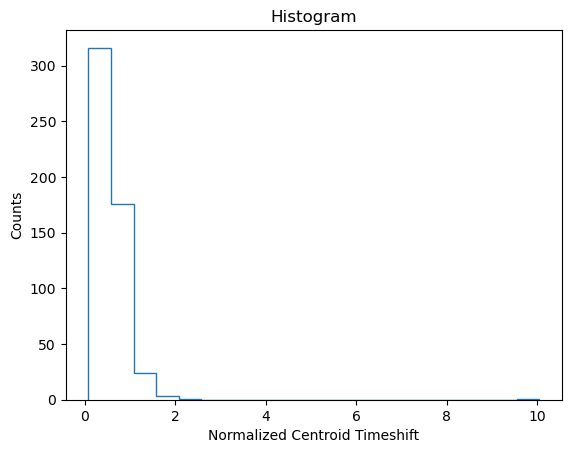

In [110]:
counts, bins = np.histogram(data, bins=20)
print(bins)
plt.figure()
plt.stairs(counts, bins)
plt.title('Histogram')
plt.ylabel('Counts')
plt.xlabel('Normalized Centroid Timeshift')

Text(0.5, 0, 'Normalized Centroid Timeshift')

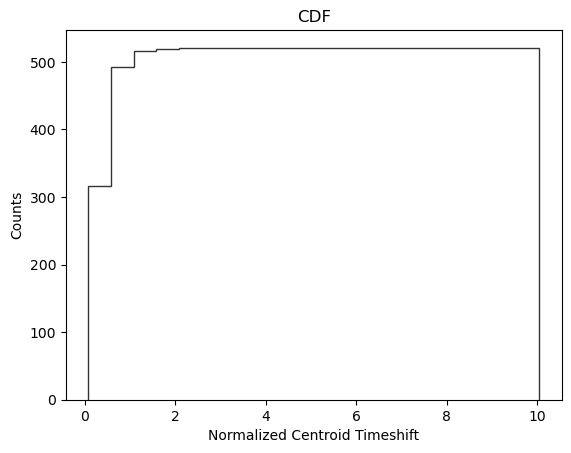

In [111]:
plt.hist(data, cumulative=True, bins=bins, label='CDF',
         histtype='step', alpha=0.8, color='k')
plt.title('CDF')
plt.ylabel('Counts')
plt.xlabel('Normalized Centroid Timeshift')

In [115]:
mag7plus[mag7plus['TcNormed'] >= 1]

,name,mb,ms,Tc,duration,TcNormed
5,MLI 1976/05/29,6.0,7.0,14.7,10.8,1.361111
11,MLI 1976/08/16,6.4,7.9,51.4,43.4,1.184332
36,MLI 1979/02/28,6.4,7.1,32.0,30.0,1.066667
43,MLI 1979/12/12,6.4,7.7,63.7,45.0,1.415556
46,MLI 1980/07/17,5.8,7.9,39.9,35.0,1.14
146,PDE 1992/09/02,5.3,7.2,44.5,37.0,1.202703
147,PDE 1992/10/18,6.6,7.3,10.5,10.2,1.029412
163,PDE 1994/06/02,5.5,7.2,39.0,23.0,1.695652
170,PDE 1994/12/28,6.4,7.5,35.5,29.6,1.199324
180,PDE 1995/07/30,6.6,7.3,33.4,32.0,1.04375
